<a href="https://colab.research.google.com/github/kashishgrover1805/IPL-Score-Predictor/blob/main/iplscorepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import ipywidgets as widgets
from IPython.display import display, clear_output

In [29]:
#Data Load
ipl = pd.read_csv("/content/ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [31]:
#Data Cleaning
df = ipl.drop(['date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker'], axis=1)

X = df.drop(['total'], axis=1)
y = df['total']


In [32]:

#Label Encoding
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [33]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
#Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2:", rf_r2)
print("Random Forest Accuracy (%):", rf_r2 * 100)

Random Forest RMSE: 7.369196856813501
Random Forest R2: 0.9356104858946868
Random Forest Accuracy (%): 93.56104858946867


In [35]:
#Cross Validation
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-val R2:", scores.mean())

Cross-val R2: 0.9327840499692612


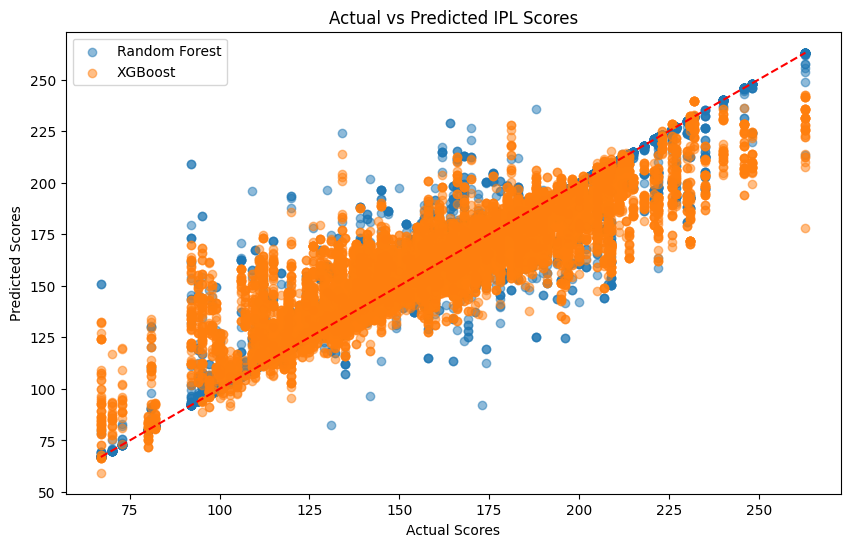

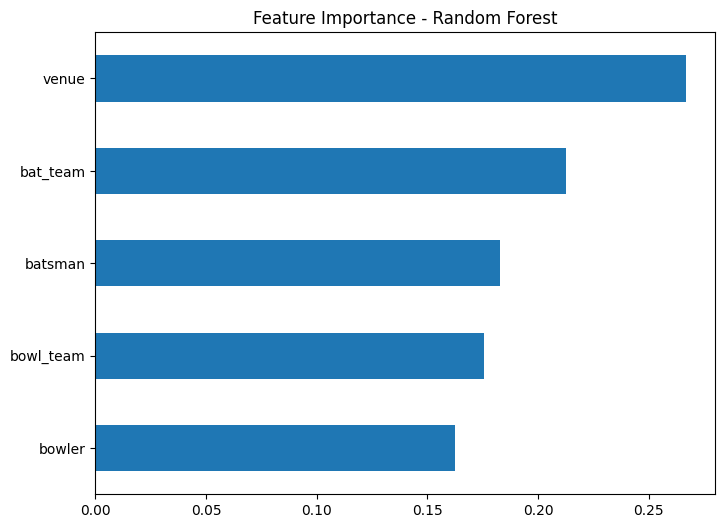

In [36]:
#Graphs
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label="XGBoost")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted IPL Scores")
plt.legend()
plt.show()

rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Random Forest")
plt.show()


In [37]:
#Interactive Prediction
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Venue:')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Bat Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Bowl Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Batsman:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()
        v = venue_encoder.transform([venue.value])
        bt = batting_team_encoder.transform([batting_team.value])
        blt = bowling_team_encoder.transform([bowling_team.value])
        s = striker_encoder.transform([striker.value])
        bw = bowler_encoder.transform([bowler.value])
        input_data = np.array([v, bt, blt, s, bw]).reshape(1, -1)
        input_data = scaler.transform(input_data)
        predicted_score = rf.predict(input_data)
        print("Predicted Score:", int(predicted_score[0]))

predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Bat Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',…

Dropdown(description='Bowl Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevil…

Dropdown(description='Batsman:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Mohammad Ha…

Dropdown(description='Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL White'…

Button(description='Predict Score', style=ButtonStyle())

Output()